# Drug Discovery
## Part 1 - Data Collection & Preprocessing


In [38]:
pip install chembl-webresource-client

Note: you may need to restart the kernel to use updated packages.


In [39]:
from chembl_webresource_client.new_client import new_client

# Initialize API clients
target = new_client.target
activity = new_client.activity

# Fetch EGFR target by UniProt ID or ChEMBL ID
egfr_target = target.filter(target_components__accession="P00533").only("target_chembl_id")
egfr_chembl_id = egfr_target[0]["target_chembl_id"]

# Query bioactivities for EGFR (CHEMBL203)
bioactivities = activity.filter(target_chembl_id=egfr_chembl_id, type="IC50", relation="=", assay_type="B")

# Save results as CSV
import pandas as pd
df = pd.DataFrame.from_records(bioactivities)
df.to_csv("egfr_bioactivity_data.csv", index=False)
print("File saved as egfr_bioactivity_data.csv")

File saved as egfr_bioactivity_data.csv


In [40]:
# Target search for EGFR
target = new_client.target
target_query = target.search('EGFR')  # Search for EGFR
targets = pd.DataFrame.from_dict(target_query)

# Display the search results
print(targets)

   cross_references           organism  \
0                []       Mus musculus   
1                []       Homo sapiens   
2                []       Homo sapiens   
3                []       Homo sapiens   
4                []       Homo sapiens   
5                []       Homo sapiens   
6                []       Homo sapiens   
7                []       Homo sapiens   
8                []       Homo sapiens   
9                []       Homo sapiens   
10               []       Homo sapiens   
11               []  Rattus norvegicus   
12               []       Homo sapiens   
13               []       Homo sapiens   
14               []       Mus musculus   
15               []       Homo sapiens   
16               []       Homo sapiens   
17               []       Homo sapiens   

                                            pref_name  score  \
0              Epidermal growth factor receptor erbB1   16.0   
1                                         EGFR/PPP1CA   16.0   
2        

In [41]:
# Select the first entry for EGFR (you can adjust this if needed)
selected_target = targets.target_chembl_id[0]
print("Selected Target:", selected_target)

# Retrieve bioactivity data for EGFR (IC50 values)
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

# Convert the results to a DataFrame
df = pd.DataFrame.from_dict(res)

# Display the first few rows of the data
print(df.head(3))

Selected Target: CHEMBL3608
  action_type activity_comment  activity_id activity_properties  \
0        None             None       110221                  []   
1        None             None       113118                  []   
2        None             None       119387                  []   

  assay_chembl_id                                  assay_description  \
0    CHEMBL675511  Inhibition of epidermal growth factor receptor...   
1    CHEMBL675511  Inhibition of epidermal growth factor receptor...   
2    CHEMBL675511  Inhibition of epidermal growth factor receptor...   

  assay_type assay_variant_accession assay_variant_mutation bao_endpoint  ...  \
0          B                    None                   None  BAO_0000190  ...   
1          B                    None                   None  BAO_0000190  ...   
2          B                    None                   None  BAO_0000190  ...   

  target_organism                        target_pref_name target_tax_id  \
0    Mus muscu

In [42]:
# Save the bioactivity data to a CSV file
df.to_csv('egfr_bioactivity_data.csv', index=False)
print("Bioactivity data saved to 'egfr_bioactivity_data.csv'")

Bioactivity data saved to 'egfr_bioactivity_data.csv'


In [43]:
# Remove rows with missing IC50 values
df2 = df[df.standard_value.notna()]

# Display the cleaned data
print(df2.head(3))

  action_type activity_comment  activity_id activity_properties  \
0        None             None       110221                  []   
1        None             None       113118                  []   
2        None             None       119387                  []   

  assay_chembl_id                                  assay_description  \
0    CHEMBL675511  Inhibition of epidermal growth factor receptor...   
1    CHEMBL675511  Inhibition of epidermal growth factor receptor...   
2    CHEMBL675511  Inhibition of epidermal growth factor receptor...   

  assay_type assay_variant_accession assay_variant_mutation bao_endpoint  ...  \
0          B                    None                   None  BAO_0000190  ...   
1          B                    None                   None  BAO_0000190  ...   
2          B                    None                   None  BAO_0000190  ...   

  target_organism                        target_pref_name target_tax_id  \
0    Mus musculus  Epidermal growth factor

In [44]:
# Label compounds based on IC50 values
bioactivity_class = []
for i in df2.standard_value:
    if float(i) >= 10000:
        bioactivity_class.append("inactive")
    elif float(i) <= 1000:
        bioactivity_class.append("active")
    else:
        bioactivity_class.append("intermediate")

# Add the bioactivity class to the DataFrame using .loc
df2.loc[:, 'bioactivity_class'] = bioactivity_class

# Display the labeled data
print(df2.head(3))

  action_type activity_comment  activity_id activity_properties  \
0        None             None       110221                  []   
1        None             None       113118                  []   
2        None             None       119387                  []   

  assay_chembl_id                                  assay_description  \
0    CHEMBL675511  Inhibition of epidermal growth factor receptor...   
1    CHEMBL675511  Inhibition of epidermal growth factor receptor...   
2    CHEMBL675511  Inhibition of epidermal growth factor receptor...   

  assay_type assay_variant_accession assay_variant_mutation bao_endpoint  ...  \
0          B                    None                   None  BAO_0000190  ...   
1          B                    None                   None  BAO_0000190  ...   
2          B                    None                   None  BAO_0000190  ...   

                         target_pref_name target_tax_id text_value  toid  \
0  Epidermal growth factor receptor erbB1

C:\Users\himan\AppData\Local\Temp\ipykernel_9320\2599954980.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'bioactivity_class'] = bioactivity_class


In [45]:
# Save the preprocessed data to a CSV file
df2.to_csv('egfr_bioactivity_preprocessed_data.csv', index=False)
print("Preprocessed data saved to 'egfr_bioactivity_preprocessed_data.csv'")

Preprocessed data saved to 'egfr_bioactivity_preprocessed_data.csv'


## Part 2 - Exploratory data analysis


In [46]:
pip install -c rdkit rdkit -y

Note: you may need to restart the kernel to use updated packages.



Usage:   
  d:\Program_file\Anaconda\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  d:\Program_file\Anaconda\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  d:\Program_file\Anaconda\python.exe -m pip install [options] [-e] <vcs project url> ...
  d:\Program_file\Anaconda\python.exe -m pip install [options] [-e] <local project path> ...
  d:\Program_file\Anaconda\python.exe -m pip install [options] <archive url/path> ...

no such option: -y


In [47]:
import pandas as pd

# Load the EGFR bioactivity data from your local file
df = pd.read_csv('egfr_bioactivity_preprocessed_data.csv')

# Display the first few rows to verify the data is loaded correctly
print(df.head())

  action_type  activity_comment  activity_id activity_properties  \
0         NaN               NaN       110221                  []   
1         NaN               NaN       113118                  []   
2         NaN               NaN       119387                  []   
3         NaN               NaN       133319                  []   
4         NaN               NaN       193384                  []   

  assay_chembl_id                                  assay_description  \
0    CHEMBL675511  Inhibition of epidermal growth factor receptor...   
1    CHEMBL675511  Inhibition of epidermal growth factor receptor...   
2    CHEMBL675511  Inhibition of epidermal growth factor receptor...   
3    CHEMBL675511  Inhibition of epidermal growth factor receptor...   
4    CHEMBL675513  Inhibition of epidermal growth factor receptor...   

  assay_type  assay_variant_accession  assay_variant_mutation bao_endpoint  \
0          B                      NaN                     NaN  BAO_0000190   
1 

In [48]:
# Drop the original SMILES column
df_no_smiles = df.drop(columns='canonical_smiles')

# Clean the SMILES data
smiles = []
for i in df.canonical_smiles.tolist():
    cpd = str(i).split('.')
    cpd_longest = max(cpd, key = len)
    smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

# Combine the cleaned SMILES with the original DataFrame
df_clean_smiles = pd.concat([df_no_smiles, smiles], axis=1)
df_clean_smiles

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,bioactivity_class,canonical_smiles
0,NaN,NaN,110221,[],CHEMBL675511,Inhibition of epidermal growth factor receptor...,B,NaN,NaN,BAO_0000190,...,10090,NaN,NaN,IC50,uM,UO_0000065,NaN,100.000,inactive,COc1cccc2c(C(=O)Nc3ccccc3)c(SSc3c(C(=O)Nc4cccc...
1,NaN,NaN,113118,[],CHEMBL675511,Inhibition of epidermal growth factor receptor...,B,NaN,NaN,BAO_0000190,...,10090,NaN,NaN,IC50,uM,UO_0000065,NaN,100.000,inactive,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3ccccc3n2C)c(C(=O)N...
2,NaN,NaN,119387,[],CHEMBL675511,Inhibition of epidermal growth factor receptor...,B,NaN,NaN,BAO_0000190,...,10090,NaN,NaN,IC50,uM,UO_0000065,NaN,100.000,inactive,CN1C(=S)C(C(=O)Nc2ccccc2)c2ccccc21
3,NaN,NaN,133319,[],CHEMBL675511,Inhibition of epidermal growth factor receptor...,B,NaN,NaN,BAO_0000190,...,10090,NaN,NaN,IC50,uM,UO_0000065,NaN,25.000,inactive,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3cccnc3n2C)c(C(=O)N...
4,NaN,NaN,193384,[],CHEMBL675513,Inhibition of epidermal growth factor receptor...,B,NaN,NaN,BAO_0000190,...,10090,NaN,NaN,IC50,uM,UO_0000065,NaN,0.070,active,C/N=N/Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,"{'action_type': 'BINDING AGENT', 'description'...",NaN,25483563,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5327905,Displacement of probe N-(4-(4-(3-((4-((3-chlor...,B,NaN,NaN,BAO_0000190,...,10090,NaN,NaN,pIC50,NaN,UO_0000065,NaN,3.900,inactive,CN(C(=O)N(C)C1CCCC1)c1ccccc1
79,NaN,NaN,25483564,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5327905,Displacement of probe N-(4-(4-(3-((4-((3-chlor...,B,NaN,NaN,BAO_0000190,...,10090,NaN,NaN,pIC50,NaN,UO_0000065,NaN,3.000,inactive,CN(C(=O)N(C)C1CCCC1)c1ccccn1
80,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25495787,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5330553,Inhibition of wild type EGFR in mouse BaF3 cel...,B,NaN,NaN,BAO_0000190,...,10090,NaN,NaN,IC50,uM,UO_0000065,NaN,1.450,intermediate,COc1cc2ncnc(NCc3ccc(NC(=O)C(c4ccccc4)N4Cc5cccc...
81,NaN,NaN,25495788,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5330553,Inhibition of wild type EGFR in mouse BaF3 cel...,B,NaN,NaN,BAO_0000190,...,10090,NaN,NaN,IC50,uM,UO_0000065,NaN,10.000,inactive,O=C(Nc1nccs1)C(c1ccccc1)N1Cc2ccccc2C1=O


In [49]:
pip install rdkit

Note: you may need to restart the kernel to use updated packages.


In [50]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

# Function to calculate Lipinski descriptors
def lipinski(smiles, verbose=False):
    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData = np.arange(1,1)
    i = 0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])

        if (i == 0):
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i = i + 1

    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)
    return descriptors

# Calculate Lipinski descriptors for EGFR data
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,622.772,7.9912,2.0,8.0
1,562.720,7.9740,2.0,6.0
2,282.368,3.1861,1.0,2.0
3,564.696,6.7640,2.0,8.0
4,357.215,4.5448,2.0,5.0
...,...,...,...,...
78,232.327,3.1172,0.0,1.0
79,233.315,2.5122,0.0,2.0
80,672.786,5.6874,2.0,9.0
81,349.415,3.4789,1.0,4.0


In [51]:
# Combine the DataFrames
df_combined = pd.concat([df_clean_smiles, df_lipinski], axis=1)
df_combined

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,units,uo_units,upper_value,value,bioactivity_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,NaN,NaN,110221,[],CHEMBL675511,Inhibition of epidermal growth factor receptor...,B,NaN,NaN,BAO_0000190,...,uM,UO_0000065,NaN,100.000,inactive,COc1cccc2c(C(=O)Nc3ccccc3)c(SSc3c(C(=O)Nc4cccc...,622.772,7.9912,2.0,8.0
1,NaN,NaN,113118,[],CHEMBL675511,Inhibition of epidermal growth factor receptor...,B,NaN,NaN,BAO_0000190,...,uM,UO_0000065,NaN,100.000,inactive,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3ccccc3n2C)c(C(=O)N...,562.720,7.9740,2.0,6.0
2,NaN,NaN,119387,[],CHEMBL675511,Inhibition of epidermal growth factor receptor...,B,NaN,NaN,BAO_0000190,...,uM,UO_0000065,NaN,100.000,inactive,CN1C(=S)C(C(=O)Nc2ccccc2)c2ccccc21,282.368,3.1861,1.0,2.0
3,NaN,NaN,133319,[],CHEMBL675511,Inhibition of epidermal growth factor receptor...,B,NaN,NaN,BAO_0000190,...,uM,UO_0000065,NaN,25.000,inactive,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3cccnc3n2C)c(C(=O)N...,564.696,6.7640,2.0,8.0
4,NaN,NaN,193384,[],CHEMBL675513,Inhibition of epidermal growth factor receptor...,B,NaN,NaN,BAO_0000190,...,uM,UO_0000065,NaN,0.070,active,C/N=N/Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1,357.215,4.5448,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,"{'action_type': 'BINDING AGENT', 'description'...",NaN,25483563,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5327905,Displacement of probe N-(4-(4-(3-((4-((3-chlor...,B,NaN,NaN,BAO_0000190,...,NaN,UO_0000065,NaN,3.900,inactive,CN(C(=O)N(C)C1CCCC1)c1ccccc1,232.327,3.1172,0.0,1.0
79,NaN,NaN,25483564,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5327905,Displacement of probe N-(4-(4-(3-((4-((3-chlor...,B,NaN,NaN,BAO_0000190,...,NaN,UO_0000065,NaN,3.000,inactive,CN(C(=O)N(C)C1CCCC1)c1ccccn1,233.315,2.5122,0.0,2.0
80,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25495787,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5330553,Inhibition of wild type EGFR in mouse BaF3 cel...,B,NaN,NaN,BAO_0000190,...,uM,UO_0000065,NaN,1.450,intermediate,COc1cc2ncnc(NCc3ccc(NC(=O)C(c4ccccc4)N4Cc5cccc...,672.786,5.6874,2.0,9.0
81,NaN,NaN,25495788,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5330553,Inhibition of wild type EGFR in mouse BaF3 cel...,B,NaN,NaN,BAO_0000190,...,uM,UO_0000065,NaN,10.000,inactive,O=C(Nc1nccs1)C(c1ccccc1)N1Cc2ccccc2C1=O,349.415,3.4789,1.0,4.0


In [52]:
import numpy as np
import pandas as pd # Make sure you import pandas

# Function to convert IC50 to pIC50
def pIC50(input):
    pIC50 = []
    for i in input['standard_value_norm']:
        molar = i * (10**-9)  # Convert nM to M
        pIC50.append(-np.log10(molar))
    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)  # Corrected line
    return x

# Normalize the standard_value column
def norm_value(input):
    norm = []
    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)
    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)  # Corrected line
    return x

# Assuming df_combined is your DataFrame
# Example: df_combined = pd.DataFrame({'standard_value': [1000, 200000000, 5000]})

# Apply normalization and pIC50 conversion
df_norm = norm_value(df_combined)
df_final = pIC50(df_norm)
print(df_final)  # Print the resulting DataFrame

                                          action_type  activity_comment  \
0                                                 NaN               NaN   
1                                                 NaN               NaN   
2                                                 NaN               NaN   
3                                                 NaN               NaN   
4                                                 NaN               NaN   
..                                                ...               ...   
78  {'action_type': 'BINDING AGENT', 'description'...               NaN   
79                                                NaN               NaN   
80  {'action_type': 'INHIBITOR', 'description': 'N...               NaN   
81                                                NaN               NaN   
82  {'action_type': 'INHIBITOR', 'description': 'N...               NaN   

    activity_id                                activity_properties  \
0        110221              

In [53]:
# Remove the intermediate class
df_2class = df_final[df_final['bioactivity_class'] != 'intermediate']
print(df_2class)  

                                          action_type  activity_comment  \
0                                                 NaN               NaN   
1                                                 NaN               NaN   
2                                                 NaN               NaN   
3                                                 NaN               NaN   
4                                                 NaN               NaN   
..                                                ...               ...   
77  {'action_type': 'BINDING AGENT', 'description'...               NaN   
78  {'action_type': 'BINDING AGENT', 'description'...               NaN   
79                                                NaN               NaN   
81                                                NaN               NaN   
82  {'action_type': 'INHIBITOR', 'description': 'N...               NaN   

    activity_id                                activity_properties  \
0        110221              

In [54]:
print(df_2class.columns)
print(df_2class.head())  # or df_2class.info()

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'target_chembl_id', 'target_organism', 'target_pref_name',
       'target_tax_id', 'text_value', 'toid', 'type', 'units', 'uo_units',
       'upper_value', 'value', 'bioactivity_class', 'canonical_smiles', 'MW',
       'LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50'],
      dtype='obj

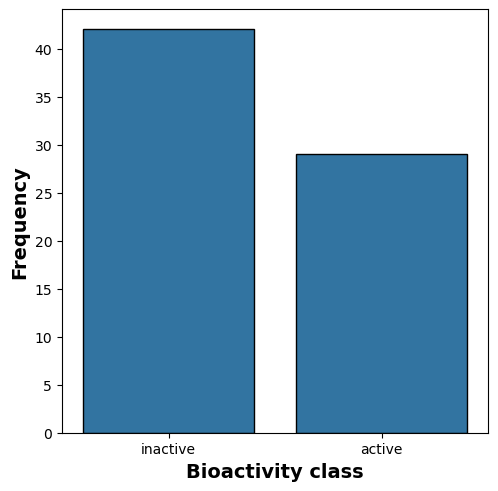

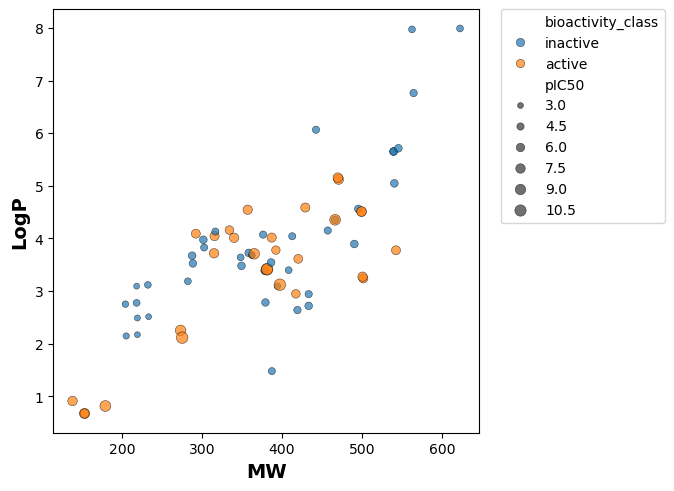

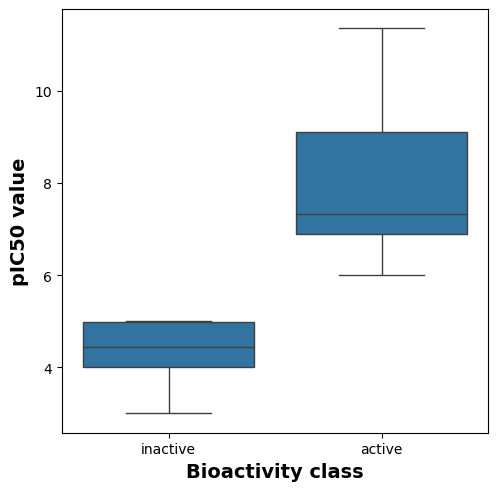

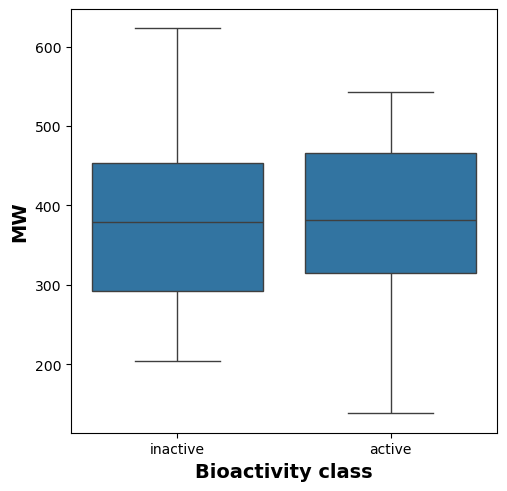

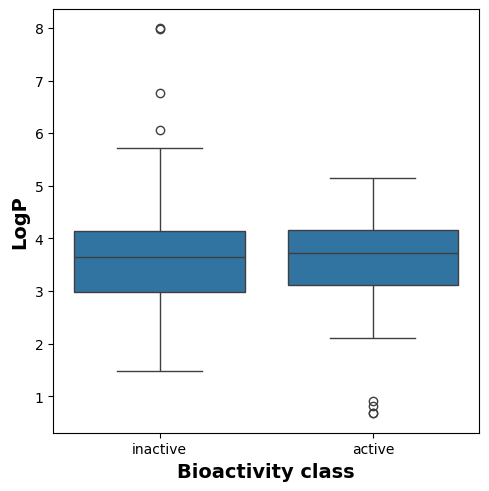

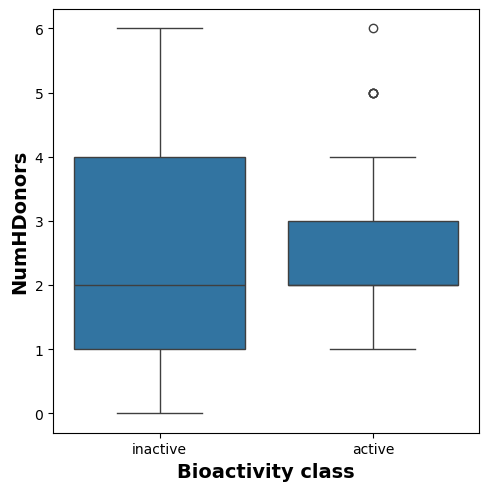

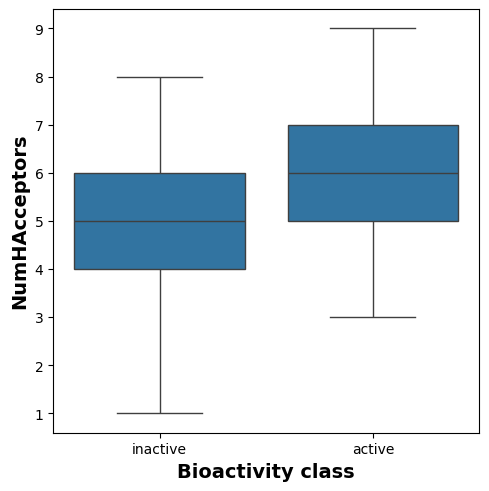

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_2class is your DataFrame with 'bioactivity_class' and other columns

# Frequency plot of the 2 bioactivity classes
plt.figure(figsize=(5.5, 5.5))
sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')  # Corrected column name
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.savefig('plot_bioactivity_class.pdf')

# Scatter plot of MW vs LogP
plt.figure(figsize=(5.5, 5.5))
sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)  # Corrected column name
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

# Box plots for pIC50, MW, LogP, NumHDonors, and NumHAcceptors
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y='pIC50', data=df_2class)  # Corrected column name
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.savefig('plot_IC50.pdf')

# Box plot for MW
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y='MW', data=df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
plt.savefig('plot_MW.pdf')

# Box plot for LogP
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y='LogP', data=df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.savefig('plot_LogP.pdf')

# Box plot for NumHDonors
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y='NumHDonors', data=df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')
plt.savefig('plot_NumHDonors.pdf')

# Box plot for NumHAcceptors
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y='NumHAcceptors', data=df_2class)  # Corrected column name
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
plt.savefig('plot_NumHAcceptors.pdf')

In [56]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming df_2class is your DataFrame with 'bioactivity_class' and other columns

# Function to perform Mann-Whitney U test
def mannwhitney(descriptor, verbose=False):
    selection = [descriptor, 'bioactivity_class']  # Corrected column name
    df = df_2class[selection]
    active = df[df['bioactivity_class'] == 'active']  # Corrected column name
    active = active[descriptor]
    inactive = df[df['bioactivity_class'] == 'inactive']  # Corrected column name
    inactive = inactive[descriptor]

    stat, p = mannwhitneyu(active, inactive)
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'

    results = pd.DataFrame({'Descriptor': descriptor,
                            'Statistics': stat,
                            'p': p,
                            'alpha': alpha,
                            'Interpretation': interpretation}, index=[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)
    return results

# Perform Mann-Whitney U test for pIC50, MW, LogP, NumHDonors, and NumHAcceptors
mannwhitney('pIC50')
mannwhitney('MW')
mannwhitney('LogP')
mannwhitney('NumHDonors')
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,773.0,0.052832,0.05,Same distribution (fail to reject H0)


In [57]:
import zipfile
import os

def zip_files(file_patterns, zip_filename):
    """Zips files matching the given patterns into a zip archive."""
    with zipfile.ZipFile(zip_filename, 'w') as zipf:
        for pattern in file_patterns:
            for filename in os.listdir():
                if filename.endswith(pattern):
                    zipf.write(filename)

# Zip CSV and PDF files
zip_files(['.csv', '.pdf'], 'results.zip')

print("results.zip created successfully.")

results.zip created successfully.


## Part 3 - Descriptor calculation

In [58]:
import requests
import zipfile
import io

url = 'https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip'
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

zip_file.extractall('.')

url_sh = 'https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh'
response_sh = requests.get(url_sh)
with open('padel.sh', 'wb') as f:
    f.write(response_sh.content)

In [59]:
import pandas as pd


# Load the EGFR bioactivity data from your local file
df = pd.read_csv('egfr_bioactivity_preprocessed_data.csv')

# Read the CSV file
df = pd.read_csv('egfr_bioactivity_preprocessed_data.csv')
df




,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,bioactivity_class
0,NaN,NaN,110221,[],CHEMBL675511,Inhibition of epidermal growth factor receptor...,B,NaN,NaN,BAO_0000190,...,Epidermal growth factor receptor erbB1,10090,NaN,NaN,IC50,uM,UO_0000065,NaN,100.000,inactive
1,NaN,NaN,113118,[],CHEMBL675511,Inhibition of epidermal growth factor receptor...,B,NaN,NaN,BAO_0000190,...,Epidermal growth factor receptor erbB1,10090,NaN,NaN,IC50,uM,UO_0000065,NaN,100.000,inactive
2,NaN,NaN,119387,[],CHEMBL675511,Inhibition of epidermal growth factor receptor...,B,NaN,NaN,BAO_0000190,...,Epidermal growth factor receptor erbB1,10090,NaN,NaN,IC50,uM,UO_0000065,NaN,100.000,inactive
3,NaN,NaN,133319,[],CHEMBL675511,Inhibition of epidermal growth factor receptor...,B,NaN,NaN,BAO_0000190,...,Epidermal growth factor receptor erbB1,10090,NaN,NaN,IC50,uM,UO_0000065,NaN,25.000,inactive
4,NaN,NaN,193384,[],CHEMBL675513,Inhibition of epidermal growth factor receptor...,B,NaN,NaN,BAO_0000190,...,Epidermal growth factor receptor erbB1,10090,NaN,NaN,IC50,uM,UO_0000065,NaN,0.070,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,"{'action_type': 'BINDING AGENT', 'description'...",NaN,25483563,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5327905,Displacement of probe N-(4-(4-(3-((4-((3-chlor...,B,NaN,NaN,BAO_0000190,...,Epidermal growth factor receptor erbB1,10090,NaN,NaN,pIC50,NaN,UO_0000065,NaN,3.900,inactive
79,NaN,NaN,25483564,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5327905,Displacement of probe N-(4-(4-(3-((4-((3-chlor...,B,NaN,NaN,BAO_0000190,...,Epidermal growth factor receptor erbB1,10090,NaN,NaN,pIC50,NaN,UO_0000065,NaN,3.000,inactive
80,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25495787,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5330553,Inhibition of wild type EGFR in mouse BaF3 cel...,B,NaN,NaN,BAO_0000190,...,Epidermal growth factor receptor erbB1,10090,NaN,NaN,IC50,uM,UO_0000065,NaN,1.450,intermediate
81,NaN,NaN,25495788,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5330553,Inhibition of wild type EGFR in mouse BaF3 cel...,B,NaN,NaN,BAO_0000190,...,Epidermal growth factor receptor erbB1,10090,NaN,NaN,IC50,uM,UO_0000065,NaN,10.000,inactive


In [60]:
with open('molecule.smi', 'r') as file:
    lines = file.readlines()

# Display the first 5 lines
for line in lines[:5]:
    print(line.strip())

COc1cccc2c(C(=O)Nc3ccccc3)c(SSc3c(C(=O)Nc4ccccc4)c4cccc(OC)c4n3C)n(C)c12	CHEMBL292323
Cn1c(SSc2c(C(=O)Nc3ccccc3)c3ccccc3n2C)c(C(=O)Nc2ccccc2)c2ccccc21	CHEMBL304414
CN1C(=S)C(C(=O)Nc2ccccc2)c2ccccc21	CHEMBL62176
Cn1c(SSc2c(C(=O)Nc3ccccc3)c3cccnc3n2C)c(C(=O)Nc2ccccc2)c2cccnc21	CHEMBL62701
C/N=N/Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1	CHEMBL137617


In [61]:
import pandas as pd
descriptors = pd.read_csv(r"D:\CS_code\Maga_Projects\Drug_Disease Predictor\descriptors_output.xls")

# Display the first few rows of the dataframe
print(descriptors.head())

           Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  \
0  CHEMBL137189           1           1           1           0           0   
1  CHEMBL137617           1           1           0           0           0   
2  CHEMBL152448           1           1           0           0           0   
3  CHEMBL153577           1           1           1           0           0   
4   CHEMBL52765           1           1           0           0           0   

   PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  PubchemFP871  \
0           0           0           0           0  ...             0   
1           0           0           0           0  ...             0   
2           0           0           0           0  ...             0   
3           0           0           0           0  ...             0   
4           0           0           0           0  ...             0   

   PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  \
0             0  

In [62]:
import numpy as np

# Function to convert IC50 to pIC50
def pIC50(input):
    pIC50 = []
    for i in input['standard_value']:
        if i > 0:  # Ensure the value is positive
            molar = i * (10**-9)  # Convert nM to M
            pIC50.append(-np.log10(molar))
        else:
            pIC50.append(np.nan)  # Handle invalid values (e.g., 0 or negative)
    input['pIC50'] = pIC50
    return input

# Apply the pIC50 function to the DataFrame
df = pIC50(df)

# Check if the pIC50 column was added
print(df.columns)

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value', 'bioactivity_class',
       'pIC50'],
      dtype='object')


In [63]:
# Drop rows with invalid pIC50 values
df = df.dropna(subset=['pIC50'])

# Check the DataFrame after dropping invalid rows
print(df.shape)
# Save the DataFrame to a CSV file
df.to_csv('egfr_bioactivity_data_with_pIC50.csv', index=False)

(83, 48)


In [64]:
selection = ['canonical_smiles', 'molecule_chembl_id']
df_selection = df[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [65]:
# Load the descriptors
df_X = pd.read_csv(r"D:\CS_code\Maga_Projects\Drug_Disease Predictor\descriptors_output.xls")
df_X = df_X.drop(columns=['Name'])

# Extract the pIC50 values
df_Y = df['pIC50']

# Combine X and Y
dataset = pd.concat([df_X, df_Y], axis=1)

In [66]:
dataset.to_csv('egfr_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

## Part 4 - Model building 
### Regression Models with Random Forest for EGFR Bioactivity Data

In [67]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [68]:
# Load the dataset
df = pd.read_csv('egfr_bioactivity_data_3class_pIC50_pubchem_fp.csv')

# Display the first few rows of the dataset
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.602060
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.154902


In [69]:
# Input features (X)
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
79,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
80,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
81,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Output variable (Y)
Y = df['pIC50']
Y

0     4.000000
1     4.000000
2     4.000000
3     4.602060
4     7.154902
        ...   
78    3.900000
79    3.000000
80    5.838632
81    5.000000
82    8.045757
Name: pIC50, Length: 83, dtype: float64

In [71]:
# Check the shape of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (83, 881)
Shape of Y: (83,)


In [ ]:
print(df.columns.tolist())

In [72]:
from sklearn.feature_selection import VarianceThreshold

# Remove low variance features
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

# Check the shape of X after removing low variance features
print("Shape of X after removing low variance features:", X.shape)

KeyError: "None of [Index(['MW', 'LogP', 'NumHDonors', 'NumHAcceptors'], dtype='object')] are in the [columns]"

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (66, 152)
Shape of Y_train: (66,)
Shape of X_test: (17, 152)
Shape of Y_test: (17,)


In [ ]:
# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, Y_train)

# Evaluate the model on the test data
r2 = model.score(X_test, Y_test)
print("R^2 Score:", r2)

R^2 Score: 0.29295674980472086


In [ ]:
# Make predictions on the test data
Y_pred = model.predict(X_test)

# Display the first few predictions
print("Predicted pIC50 values:", Y_pred[:5])

Predicted pIC50 values: [4.64229254 4.52848828 5.38797594 4.34435214 5.04571997]


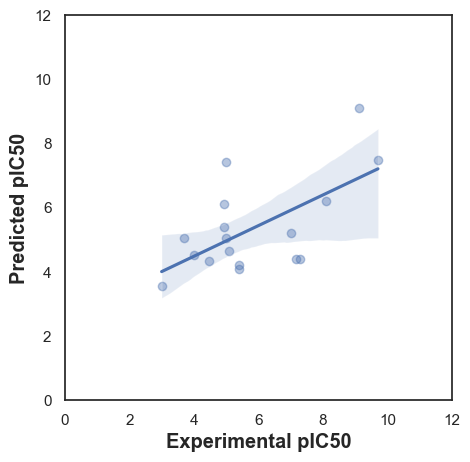

In [ ]:
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(color_codes=True)
sns.set_style("white")

# Create a scatter plot
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)

# Show the plot
plt.show()

In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'egfr_model.pkl')

['egfr_model.pkl']

## Part 5 - Model comparison


In [ ]:
# Install lazypredict
! pip install lazypredict

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

In [ ]:
# Initialize LazyRegressor
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate models on the training and test sets
models_train, predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test, predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 66, number of used features: 119
[LightGBM] [Info] Start training from score 5.722514
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 66, number of used features: 119
[LightGBM] [Info] Start training from score 5.722514
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [ ]:
# Display the performance of models on the training set
print("Training Set Performance:")
print(predictions_train)

Training Set Performance:
                                                              Adjusted R-Squared  \
Model                                                                              
Lars                          23344646714889473085043169787330370070643953233...   
KernelRidge                                                                 7.58   
QuantileRegressor                                                           1.85   
LassoLars                                                                   1.75   
DummyRegressor                                                              1.75   
Lasso                                                                       1.75   
ElasticNet                                                                  1.68   
LassoLarsCV                                                                 1.51   
SVR                                                                         1.50   
LassoCV                                           

In [ ]:
# Display the performance of models on the test set
print("Test Set Performance:")
print(predictions_test)

Test Set Performance:
                                                              Adjusted R-Squared  \
Model                                                                              
Lars                          15324443112737174645878084957551615947401495310...   
TransformedTargetRegressor                          1524078998318356954611712.00   
LinearRegression                                    1524078998318356954611712.00   
KernelRidge                                                                 2.95   
GaussianProcessRegressor                                                    1.99   
HuberRegressor                                                              1.29   
Ridge                                                                       1.24   
LinearSVR                                                                   1.23   
ExtraTreesRegressor                                                         1.17   
DecisionTreeRegressor                                 

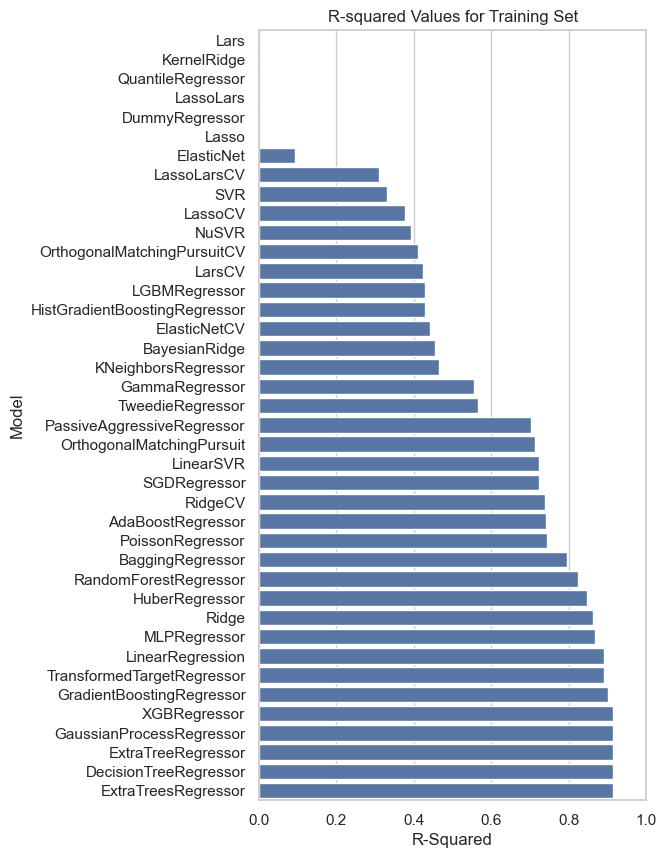

In [ ]:
import matplotlib.pyplot as plt

# Bar plot of R-squared values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))
plt.title("R-squared Values for Training Set")
plt.show()

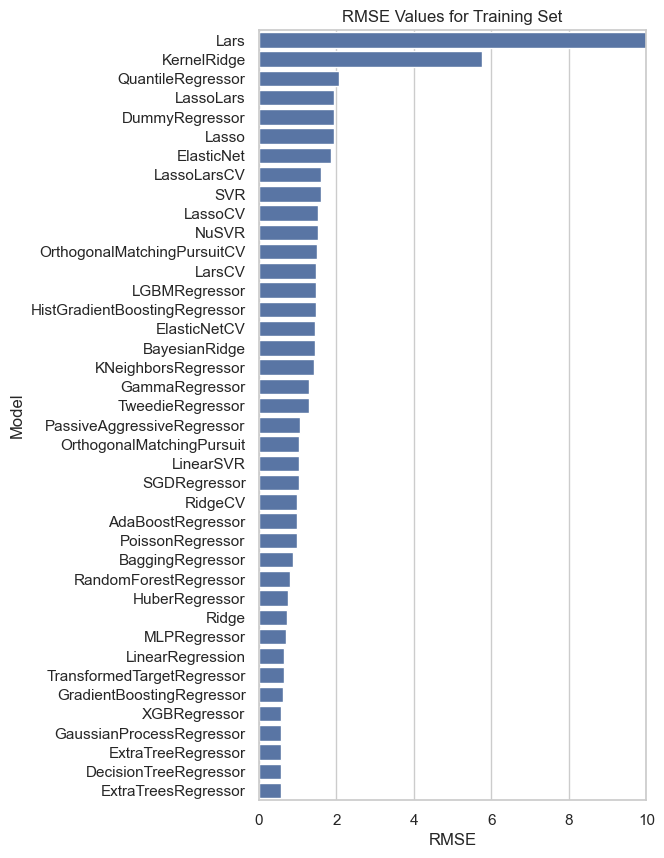

In [ ]:
# Bar plot of RMSE values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))
plt.title("RMSE Values for Training Set")
plt.show()

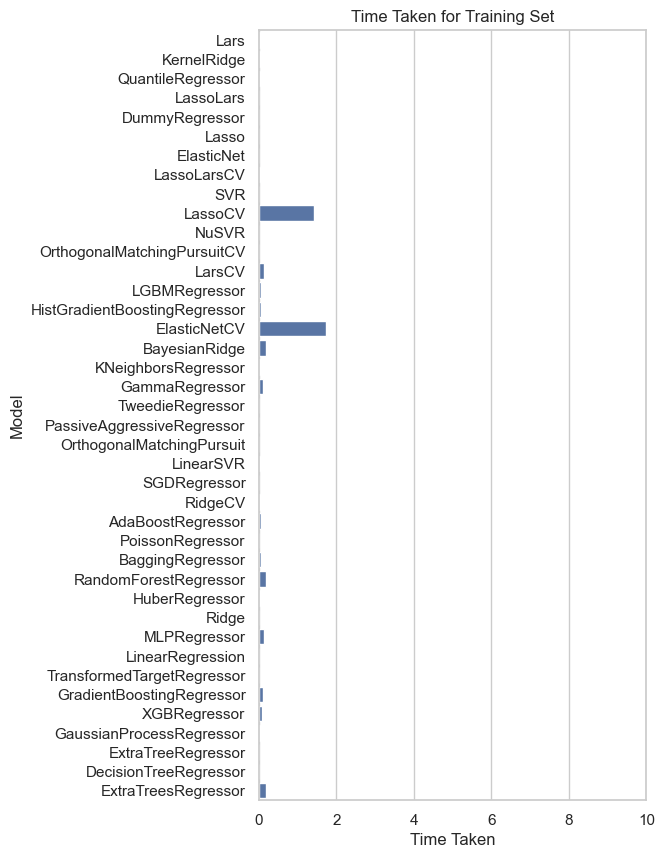

In [ ]:
# Bar plot of time taken
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))
plt.title("Time Taken for Training Set")
plt.show()

In [ ]:
# Save the training set performance results
predictions_train.to_csv('egfr_regression_models_train_performance.csv')

# Save the test set performance results
predictions_test.to_csv('egfr_regression_models_test_performance.csv')